In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [15]:
df = pd.read_csv("./WorldCups.csv")
print(df.columns)

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'], dtype='object')


In [16]:
print(df[["Year","Attendance"]].head())

   Year Attendance
0  1930    590.549
1  1934    363.000
2  1938    375.700
3  1950  1.045.246
4  1954    768.607


In [17]:
world_cups = pd.read_csv("WorldCups.csv")
world_cups = world_cups[["Year","Attendance"]]
print(world_cups)

    Year Attendance
0   1930    590.549
1   1934    363.000
2   1938    375.700
3   1950  1.045.246
4   1954    768.607
5   1958    819.810
6   1962    893.172
7   1966  1.563.135
8   1970  1.603.975
9   1974  1.865.753
10  1978  1.545.791
11  1982  2.109.723
12  1986  2.394.031
13  1990  2.516.215
14  1994  3.587.538
15  1998  2.785.100
16  2002  2.705.197
17  2006  3.359.439
18  2010  3.178.856
19  2014  3.386.810


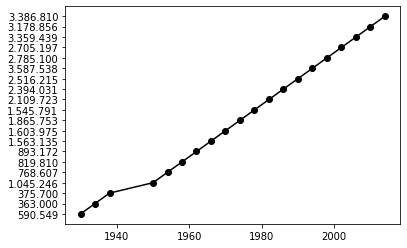

In [20]:
plt.plot(world_cups["Year"], world_cups["Attendance"], marker='o', color='black')

In [39]:
df["GoalsPerMatch"] = df["GoalsScored"]/df["MatchesPlayed"]

In [40]:
df = df[['Year','GoalsScored', 'MatchesPlayed']]
df["GoalsPerMatch"] = df["GoalsScored"]/df["MatchesPlayed"]

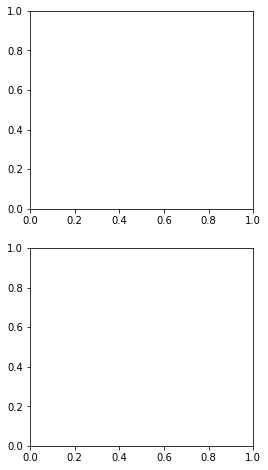

In [41]:
fig, axes = plt.subplots(2,1,figsize=(4,8))

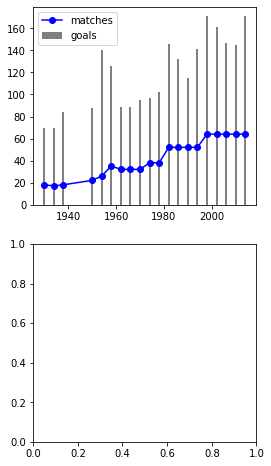

In [42]:
axes[0].bar(x=df['Year'], height=df['GoalsScored'], color='grey', label='goals')
axes[0].plot(df['Year'], df['MatchesPlayed'], marker='o', color='blue', label='matches')
axes[0].legend(loc='upper left')
fig

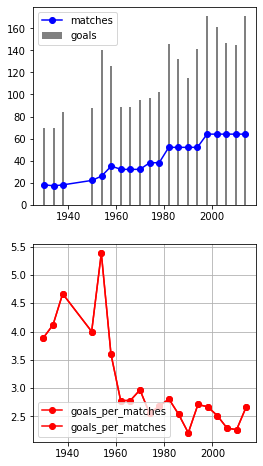

In [44]:
axes[1].grid(True)
axes[1].plot(df['Year'], df['GoalsPerMatch'], marker='o', color='red', label='goals_per_matches')
axes[1].legend(loc='lower left')
fig

### Preprocessing


In [119]:
# 이상한 값들 고치기
world_cup_matches = pd.read_csv("./WorldCupMatches.csv")

In [120]:
print(world_cup_matches["Away Team Name"].unique())
print(world_cup_matches["Home Team Name"].unique())

['Mexico' 'Belgium' 'Brazil' 'Peru' 'France' 'Bolivia' 'Paraguay'
 'Romania' 'Chile' 'USA' 'Yugoslavia' 'Argentina' 'Egypt' 'Netherlands'
 'Switzerland' 'Sweden' 'Spain' 'Hungary' 'Austria' 'Germany'
 'Czechoslovakia' 'Dutch East Indies' 'Norway' 'Poland' 'Cuba' 'Italy'
 'England' 'Scotland' 'Turkey' 'Korea Republic' 'Germany FR' 'Uruguay'
 'Wales' 'Northern Ireland' 'Soviet Union' 'Colombia' 'Bulgaria'
 'Korea DPR' 'Portugal' 'Israel' 'Morocco' 'El Salvador' 'Australia'
 'Haiti' 'German DR' 'Zaire' 'IR Iran' 'Tunisia' 'Iran' 'Cameroon'
 'New Zealand' 'Algeria' 'Honduras' 'Kuwait' 'Iraq' 'Denmark' 'Canada'
 'rn">Republic of Ireland' 'rn">United Arab Emirates' 'Costa Rica'
 'Saudi Arabia' 'Russia' 'Greece' 'Nigeria' 'South Africa' 'Japan'
 'Croatia' 'Jamaica' 'Senegal' 'Slovenia' 'Ecuador' 'China PR'
 "C�te d'Ivoire" 'Czech Republic' 'Ghana' 'Togo' 'Ukraine'
 'rn">Trinidad and Tobago' 'rn">Serbia and Montenegro' 'Angola' 'Slovakia'
 'Serbia' 'rn">Bosnia and Herzegovina' nan]
['France' '

In [121]:
world_cup_matches = world_cup_matches.replace('Germany FR','Germany')
world_cup_matches = world_cup_matches.replace('C�te d\'Ivoire','Côte d\'Ivoire')
world_cup_matches = world_cup_matches.replace('rn\">Bosnia and Herzegovina','Bosnia and Herzegovina')
world_cup_matches = world_cup_matches.replace('rn\">Serbia and Montenegro','Serbia and Montenegro')
world_cup_matches = world_cup_matches.replace('rn\">Republic of Ireland','Republic of Ireland')
world_cup_matches = world_cup_matches.replace('rn\">United Arab Emirates','United Arab Emirates')
world_cup_matches = world_cup_matches.replace('rn\">Trinidad and Tobago','Trinidad and Tobago')
world_cup_matches = world_cup_matches.replace('Soviet Union','Russia')

In [122]:
print(world_cup_matches["Away Team Name"].unique())
print(world_cup_matches["Home Team Name"].unique())

['Mexico' 'Belgium' 'Brazil' 'Peru' 'France' 'Bolivia' 'Paraguay'
 'Romania' 'Chile' 'USA' 'Yugoslavia' 'Argentina' 'Egypt' 'Netherlands'
 'Switzerland' 'Sweden' 'Spain' 'Hungary' 'Austria' 'Germany'
 'Czechoslovakia' 'Dutch East Indies' 'Norway' 'Poland' 'Cuba' 'Italy'
 'England' 'Scotland' 'Turkey' 'Korea Republic' 'Uruguay' 'Wales'
 'Northern Ireland' 'Russia' 'Colombia' 'Bulgaria' 'Korea DPR' 'Portugal'
 'Israel' 'Morocco' 'El Salvador' 'Australia' 'Haiti' 'German DR' 'Zaire'
 'IR Iran' 'Tunisia' 'Iran' 'Cameroon' 'New Zealand' 'Algeria' 'Honduras'
 'Kuwait' 'Iraq' 'Denmark' 'Canada' 'Republic of Ireland'
 'United Arab Emirates' 'Costa Rica' 'Saudi Arabia' 'Greece' 'Nigeria'
 'South Africa' 'Japan' 'Croatia' 'Jamaica' 'Senegal' 'Slovenia' 'Ecuador'
 'China PR' "Côte d'Ivoire" 'Czech Republic' 'Ghana' 'Togo' 'Ukraine'
 'Trinidad and Tobago' 'Serbia and Montenegro' 'Angola' 'Slovakia'
 'Serbia' 'Bosnia and Herzegovina' nan]
['France' 'USA' 'Yugoslavia' 'Romania' 'Argentina' 'Chile' '

In [123]:
#중복값 확인
dup = world_cup_matches.duplicated()
print(len(dup[dup==True]))
print(len(world_cup_matches))

3735
4572


In [124]:
world_cup_matches = world_cup_matches.drop_duplicates()

In [125]:
dup = world_cup_matches.duplicated()
print(len(dup[dup==True]))

0


In [154]:
home = world_cup_matches.groupby(["Home Team Name"])["Home Team Goals"].sum()
away = world_cup_matches.groupby(["Away Team Name"])["Away Team Goals"].sum()

In [175]:
print(len(home))
print(len(away))

76
81


In [178]:
goal_per_country = pd.concat([home,away], axis=1, sort = True).fillna(0)
goal_per_country.head()

,Home Team Goals,Away Team Goals
Algeria,5.0,8.0
Angola,0.0,1.0
Argentina,109.0,22.0
Australia,7.0,4.0
Austria,31.0,12.0


In [179]:
goal_per_country["Goals"] = goal_per_country["Home Team Goals"] + goal_per_country["Away Team Goals"]
goal_per_country.head()

,Home Team Goals,Away Team Goals,Goals
Algeria,5.0,8.0,13.0
Angola,0.0,1.0,1.0
Argentina,109.0,22.0,131.0
Australia,7.0,4.0,11.0
Austria,31.0,12.0,43.0


In [180]:
goal_per_country = goal_per_country["Goals"].sort_values(ascending = False)
# goal_per_country = goal_per_country.astype(int)
goal_per_country.head()
goal_per_country = goal_per_country.rename(index="countries")

In [181]:
goal_per_country = goal_per_country[:10]
goal_per_country

Germany        224.0
Brazil         221.0
Argentina      131.0
Italy          128.0
France         106.0
Spain           92.0
Hungary         87.0
Netherlands     86.0
Uruguay         80.0
England         79.0
Name: countries, dtype: float64

In [182]:
x = goal_per_country.index
y = goal_per_country.values
x

Index(['Germany', 'Brazil', 'Argentina', 'Italy', 'France', 'Spain', 'Hungary', 'Netherlands', 'Uruguay', 'England'], dtype='object')

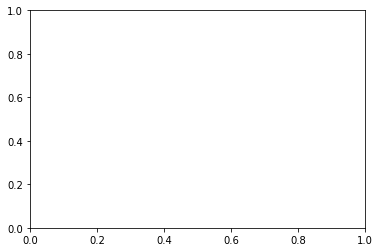

In [173]:
fig ,ax = plt.subplots()

ConversionError: Failed to convert value(s) to axis units: Index(['Germany', 'Brazil', 'Argentina', 'Italy', 'France', 'Spain', 'Hungary', 'Netherlands', 'Uruguay', 'England'], dtype='object')

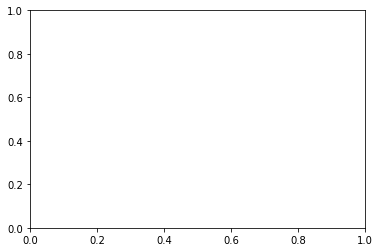

In [174]:
ax.bar(x,y,width = 0.5)
plt.xticks(x, rotation = 90)
plt.tight_layout()
fig